In [14]:
import sys
import os
sys.path.insert(0, os.path.abspath('../..'))
import torch
import numpy as np
import utils
import matplotlib.pyplot as plt
from dataset import DataSet
import pandas as pd
from sklearn.decomposition import PCA
%load_ext autoreload
np.random.seed(2) ## keep same shuffled as was trained on 
torch.manual_seed(2)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## load a checkpoint & dataset the network trained on

In [4]:
lcs = utils.get_data('../../datasets/ZTF_g',shuffle=True, split=1.0)


validated 3408 files out of 3408 for band='g'
created union_tp attribute of length 3500
dataset created w/ shape (2559, 1, 1974, 3)
train size: 2559, valid size: 0, test size: 0


In [6]:
net, optimizer, args, epoch, loss, train_loss, test_loss = utils.load_checkpoint('../checkpoints/final/ZTF_g0.668415367603302.h5', lcs.data_obj)


=> loading checkpoint '../checkpoints/final/ZTF_g0.668415367603302.h5'
Namespace(n_union_tp=3500, data_folder='datasets/ZTF_g', checkpoint='datasets/ZTF_g0.7037358283996582.h5', start_col=1, inc_errors=False, print_at=1, embed_time=128, enc_num_heads=16, latent_dim=64, mixing='concat', num_ref_points=16, rec_hidden=128, width=512, save_at=30, patience=100, early_stopping=False, niters=20000, frac=0.5, batch_size=2, mse_weight=5.0, dropout=0.0, num_resamples=0, lr=1e-06, scheduler=False, warmup=4000, kl_zero=False, kl_annealing=True, net='hetvae', device='mps', const_var=False, var_per_dim=False, std=0.1, seed=2, save=True, k_iwae=1)


## ANOMOLOUS WRT NLL/MSE

In [27]:
avg_nll,avg_mse,nlls=utils.evaluate_hetvae(net,len(lcs.bands),lcs.data_obj['train_loader'],frac=0.5,k_iwae=1, device='mps',forecast=False)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1280/1280 [20:30<00:00,  1.04it/s]

nll: 11.0046, mse: 0.4595, mae: 0.4873, mean_mse: 6.2304, mean_mae: 0.4873


(array([2.497e+03, 3.500e+01, 1.300e+01, 6.000e+00, 5.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00]),
 array([2.0773064e-01, 1.9315234e+03, 3.8628391e+03, 5.7941548e+03,
        7.7254707e+03, 9.6567861e+03, 1.1588103e+04, 1.3519418e+04,
        1.5450733e+04, 1.7382049e+04, 1.9313365e+04], dtype=float32),
 <BarContainer object of 10 artists>)

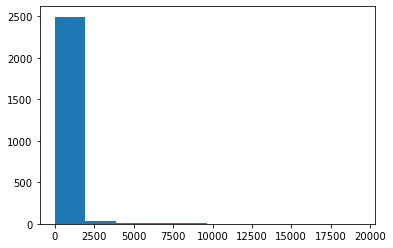

In [30]:
plt.hist(-1 *nlls)

In [35]:
mu = np.mean(nlls)
std = np.std(nlls)

In [50]:
anoms_i = (nlls > (mu+(2*std))) | (nlls < (mu-(2*std)))

In [51]:
lcs.valid_files_df.index[anoms_i]

Index(['122606.13+233546.1', '144827.83+084130.5', '013300.65+160516.3',
       '164933.00+205839.0', '124152.93+240026.4', '100516.42+364214.7',
       '090136.66+474233.0', '143234.58+454441.2', '150232.97+062337.6',
       '082436.86+133612.4', '222852.60-075346.6', '081249.41+454629.9',
       '140519.92+474553.9', '091101.87+280746.9', '144837.61+112104.1',
       '160324.86+231531.5', '114552.32+241732.3', '141548.59+422522.9',
       '142535.31+530019.3', '075627.68+272326.3', '021251.11-004337.8',
       '080217.01+280609.2', '155149.75+141955.7', '124631.21+530111.0',
       '100500.68+315847.8', '095739.64+454557.4', '085027.12+351320.1',
       '161924.11+260907.2', '085749.87+415223.8', '142249.29+312711.0',
       '104211.35+454746.7', '034430.16+000407.3', '161524.59+190002.5',
       '133149.10+150055.5', '232529.43-004735.0', '135407.35+351509.7',
       '151720.91+332129.6', '102853.66+174148.5', '151524.56+160912.3',
       '151215.76+170638.0', '222808.99+185920.8', 

In [52]:
anoms = '122606.13+233546.1', '144827.83+084130.5', '013300.65+160516.3',
       '164933.00+205839.0', '124152.93+240026.4', '100516.42+364214.7',
       '090136.66+474233.0', '143234.58+454441.2', '150232.97+062337.6',
       '082436.86+133612.4', '222852.60-075346.6', '081249.41+454629.9',
       '140519.92+474553.9', '091101.87+280746.9', '144837.61+112104.1',
       '160324.86+231531.5', '114552.32+241732.3', '141548.59+422522.9',
       '142535.31+530019.3', '075627.68+272326.3', '021251.11-004337.8',
       '080217.01+280609.2', '155149.75+141955.7', '124631.21+530111.0',
       '100500.68+315847.8', '095739.64+454557.4', '085027.12+351320.1',
       '161924.11+260907.2', '085749.87+415223.8', '142249.29+312711.0',
       '104211.35+454746.7', '034430.16+000407.3', '161524.59+190002.5',
       '133149.10+150055.5', '232529.43-004735.0', '135407.35+351509.7',
       '151720.91+332129.6', '102853.66+174148.5', '151524.56+160912.3',
       '151215.76+170638.0', '222808.99+185920.8', '110901.46+474200.1',
       '151009.36+323913.8', '145954.07+351733.9', '152530.99+250108.4',
       '093137.42+564545.0', '114230.42+312002.4', '162614.31+483912.0',
       '080534.87+422907.9', '125812.90+371151.3', '151020.36+185632.2',
       '160815.29+043605.9', '164334.44+241132.2', '130255.44+241210.2',
       '133351.07+232201.6', '123637.00+332215.7', '100106.38+030309.8',
       '161431.70+170311.5', '094838.89+052127.0', '152312.86+154654.6',
       '092322.60+043239.0', '085850.41+393219.0']

In [56]:
# number anoms in test set? 
tr = int(len(lcs.dataset) * 0.9) # train-test split point
len(list(set(lcs.valid_files_df.index[tr:]) & set(anoms)))

7

In [58]:
np.savetxt('nlls_g',nlls)